# Intro to Artificial Neural Networks with Keras

In Artificial Intelligence we get inspiration from nature. And it is in nature that sparked the idea of a artificual neural network. This is a way to mimic biological neurons in code. 

ANNs are at the core of Deep learning, they are versatile, poewrful and scalable, making them ideal to tackle large adn hihgly complex Machine Learning tasks. 

ANNs were first created in a paper in 1943 and it thought to be the next wave of AI. However it died down but now with some much data available and a ton of cheap computing power we are able to take advantage of this framework. 

The way to think of a artificial neuron, is that has 1 or more binary inputs and one binary output. The inputs are on and off switches. 

<img src='images/anns_logical_computation.png'/> </img>

* The first network on the left is the identiy function: if neuron A is activated, then neuron C gets activated as well but if neuron A is off then neuron C is off as well. 

* The second network performs a logical AND neuron C gets activated if either neuron A or neuron B is activated

* The third network performs a logical OR neuron C gets activated if either neuron A or neuron B is activated or both

* Finally, if we suppose that an input connection can inhibit the neurons's activity (which is the case with biological neurons), then the fourth networks computes a slighty more complex logical propsition: Neuron C is activated  only if Nueron A is actiave and neuron B is off. If neuron A isactivate all the time then you get a logical NOT neuron C is active when neuron B is off and vice versa. 

# Perceptron

This is one of the simplest ANN architectures, it is based on a neuron called the Threshold logic unit. The input and outputs are numbers instead of binary on and off switches. Each input connection is associated with a weight. The TLU computes a weighted sum of its input then applies a step funciton to that sum and outputs the results.

<img src="images/tlu.png"/></img>

The most common function is the Heaviside step function. It is a function who values are 0 for negative arguements and 1 for positive arguements. More on teh function on this link: https://en.wikipedia.org/wiki/Heaviside_step_function

A single TLU can be used for simple linear binary classification. It computes a linear combination of the inputs, and if the result exceeds a threshold, it outputs the positive class. 

A perceptron is simply composed of a single layer of TLUs with each TLU connected to all the inputs. When all the neurons in a layer are connected to every neuron in the previous layer, the layer is called *fully connected layer* or a *dense layer*. The Inputs of the Perceptron are fed to a special passthrough neurons called input neurons: they output whatever input they are fed. All the input neurons form the input layer. An extra bias feature is generally added. It is typically represented using a special type of neuron called a bias neuron, which ooutputs 1 all teh time. A perceptron with two inputs and three outputs is represented in Figure10-5. This perceptron cal classify instances simultaneously into three different binary classes which makes it a multioutput classifer. 

<img src="images/figure_10_5.png"></img>

How does a preceptron train?

Well it comes down to the connection between Neurons the stronger the connection the better. A preceptron is fed one training instances at a time and for each instances it makes its predictions. For every output neuron that produced a wrong preddiction, it reinforces the connection weights from the inputs that would have contributed to the correct prediction. 

So a neuron that made the right connection produced the neuron that has the connect connection. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf
assert tf.__version__ >= "2.0"

In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [3]:
iris = load_iris()
X = iris.data[:,(2,3)]
y = (iris.target == 0).astype(np.int)

In [4]:
per_clf = Perceptron()
per_clf.fit(X,y)

Perceptron()

In [5]:
y_pred = per_clf.predict([[2,0.5]])

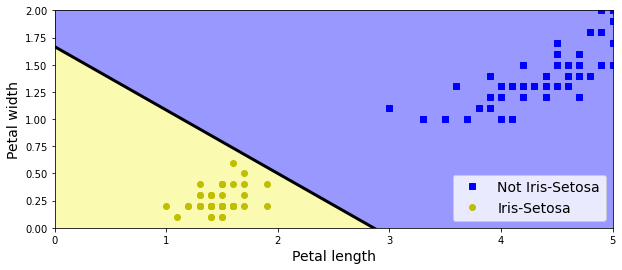

In [6]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

#save_fig("perceptron_iris_plot")
plt.show()

THe decision boundary for each output neuron should be linear, since Perceptrons are incapable of leanring complex patterns. So the dataset should be linearly separable. THis is called the Perceptron convergence theorem. 

The above shows strong similarities with Stochastic Gradient Descent but they do not have a probability output just a hard threshold. 